## ML Project: BMW car Price Optimisation


In [1]:
# import libraries for data mining
import numpy as np
import pandas as pd
# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
csales_dt = pd.read_csv("bmw_pricing_challenge.csv")

### Descriptive Analysis

In [3]:
csales_dt.tail()
csales_dt.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
csales_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [5]:
# numerical summary statistics
csales_dt.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [6]:
# categorical description
csales_dt.describe(include="object")

,maker_key,model_key,registration_date,fuel,paint_color,car_type,sold_at
count,4843,4843,4843,4843,4843,4843,4843
unique,1,75,199,4,10,8,9
top,BMW,320,2013-07-01,diesel,black,estate,2018-05-01
freq,4843,752,173,4641,1633,1606,809


In [7]:
cdata_shape = csales_dt.shape
print(f"Number of cars (rows): \t\t\t {cdata_shape[0]}")
print(f"Number of car features (columns): \t {cdata_shape[1]}")

Number of cars (rows): 			 4843
Number of car features (columns): 	 18


### Data Preprocessing

In [8]:
csales_dt.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [9]:
# identify duplicated rows
num_dupl_rows = csales_dt.duplicated().sum()
print(f"Number of duplicated rows: {num_dupl_rows}")

Number of duplicated rows: 0


In [10]:
# remove irrelevant features
irr_features = ['maker_key','feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8']

def remove_features(feature_list, data): 
  for feature in feature_list:
    data = data.drop(columns=feature)
  return data

csales_dt = remove_features(irr_features, csales_dt)

In [11]:
# rename feature names
csales_dt = csales_dt.rename(columns={
  "model_key":"model",
  "sold_at": "sales_date",
  "price": "price_eur"
})

In [12]:
csales_dt.head()

,model,mileage,engine_power,registration_date,fuel,paint_color,car_type,price_eur,sales_date
0,118,140411,100,2012-02-01,diesel,black,convertible,11300,2018-01-01
1,M4,13929,317,2016-04-01,petrol,grey,convertible,69700,2018-02-01
2,320,183297,120,2012-04-01,diesel,white,convertible,10200,2018-02-01
3,420,128035,135,2014-07-01,diesel,red,convertible,25100,2018-02-01
4,425,97097,160,2014-12-01,diesel,silver,convertible,33400,2018-04-01


### Univariate Analysis

In [13]:
# feature understanding
csales_dt["model"].value_counts()
# price feature
price = csales_dt["price_eur"]

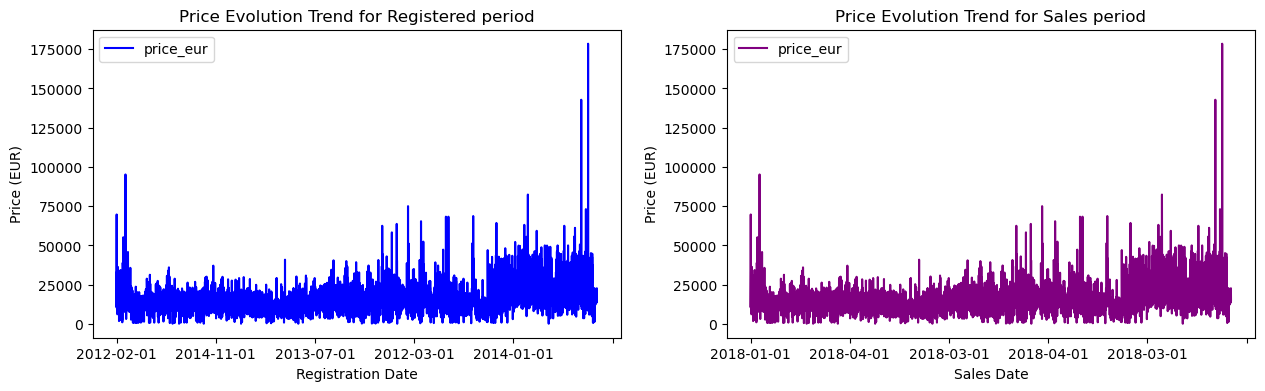

In [14]:
# visualise price distribution for registration date and sales date
fig, price_dist = plt.subplots(1,2, figsize=(15,4))
rd_price_dist = csales_dt.plot(kind="line", x="registration_date",y="price_eur", ax=price_dist[0], color="blue")
sd_price_df = csales_dt.plot(kind="line", x="sales_date",y="price_eur", ax=price_dist[1], color="purple")

# registration price distribution - graph details
def add_graph_details(graph, x, y, title):
  graph.set_xlabel(x)
  graph.set_ylabel(y)
  graph.set_title(title)
  return graph

title1 = "Price Evolution Trend for Registered period"
title2 = "Price Evolution Trend for Sales period"
rd_price_dist = add_graph_details(rd_price_dist, "Registration Date", "Price (EUR)", title1)
sd_price_df = add_graph_details(sd_price_df, "Sales Date", "Price (EUR)", title2)

In [15]:
rd_sales = csales_dt.groupby("registration_date")[["price_eur"]].sum().reset_index()
sd_sales = csales_dt.groupby("sales_date")[["price_eur"]].sum().reset_index()

# visualise sales trend
def vis_sales_trend(sales_data, x, x_name, title, color, y_name="Price (EUR)"): 
  trend = sales_data.plot(kind="line", x=x, y="price_eur", color=color, figsize=(14,3))
  trend.set_xlabel(x_name)
  trend.set_ylabel(y_name)
  trend.set_title(title)
  plt.show()
  return trend

In [16]:
sd_sales

,sales_date,price_eur
0,2018-01-01,3101000
1,2018-02-01,8054900
2,2018-03-01,11497600
3,2018-04-01,11114500
4,2018-05-01,12990500
5,2018-06-01,9260100
6,2018-07-01,8275900
7,2018-08-01,8884800
8,2018-09-01,3476100


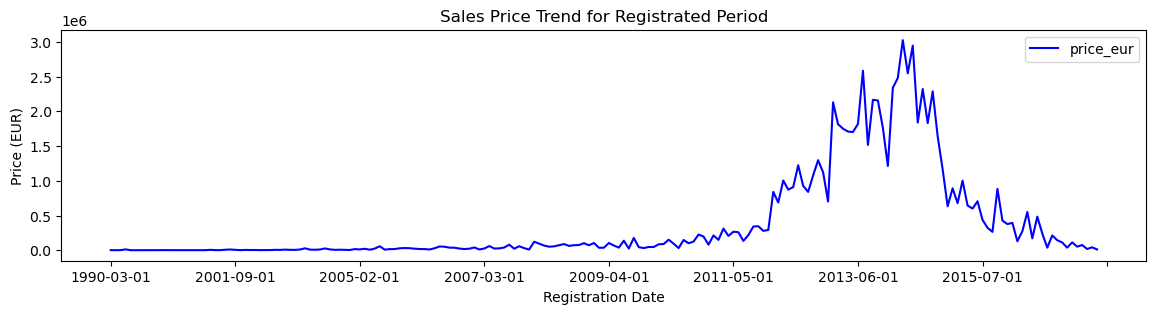

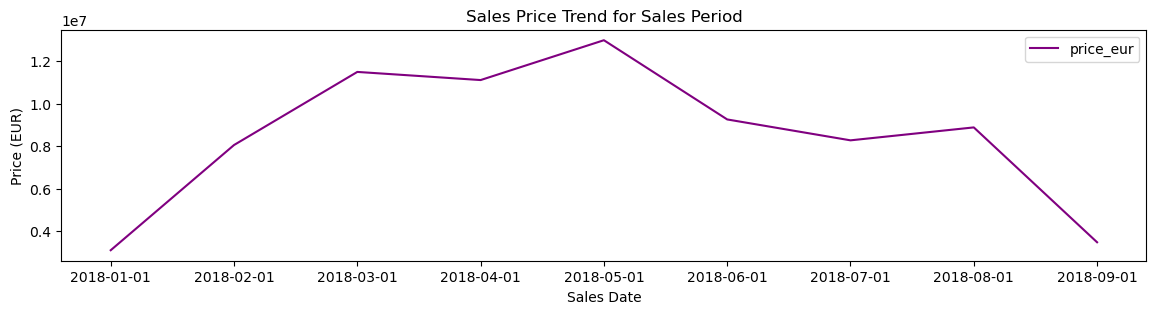

In [17]:
# subplotting
# fig, plot = plt.subplots(2,1, figsize=(12, 8))

# attributes for creating sales trend
rd_title = "Sales Price Trend for Registrated Period"
sd_title = "Sales Price Trend for Sales Period"
rd_name_x = "Registration Date"
sd_name_x = "Sales Date"
# creating sales trend

rd_trend = vis_sales_trend(rd_sales, "registration_date", rd_name_x, rd_title ,"blue")
sd_trend = vis_sales_trend(sd_sales, "sales_date", sd_name_x, sd_title, "purple")


### Feature Engineering

In [18]:
csales_dt

,model,mileage,engine_power,registration_date,fuel,paint_color,car_type,price_eur,sales_date
0,118,140411,100,2012-02-01,diesel,black,convertible,11300,2018-01-01
1,M4,13929,317,2016-04-01,petrol,grey,convertible,69700,2018-02-01
2,320,183297,120,2012-04-01,diesel,white,convertible,10200,2018-02-01
3,420,128035,135,2014-07-01,diesel,red,convertible,25100,2018-02-01
4,425,97097,160,2014-12-01,diesel,silver,convertible,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,22700,2018-09-01


In [19]:
# feature exploration
csales_dt["fuel"].value_counts()
csales_dt["car_type"].value_counts()

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [20]:
# showing all bmw models from the dataset
csales_dt["model"].value_counts()

320                  752
520                  633
318                  569
X3                   438
116                  358
                    ... 
220 Active Tourer      1
635                    1
M135                   1
225 Active Tourer      1
214 Gran Tourer        1
Name: model, Length: 75, dtype: int64

In [21]:
# feature engineering: featues -> fuel, 
fuel_types = pd.get_dummies(csales_dt["fuel"])
csales_dt = pd.concat([csales_dt, fuel_types], axis=1)
csales_dt = csales_dt.drop(columns=["fuel"])

In [22]:
csales_dt["model"].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       '225 Active Tourer', '214 Gran Tourer'], dtype=object)

In [23]:
# # extract 4 bmw models for the analysis: coupe, tourer, m, x
# bmw_tourer = csales_dt[csales_dt["model"].str.contains("Tourer")]
# bmw_m = csales_dt[csales_dt["model"].str.contains("M")]
# bmw_coupe = csales_dt[csales_dt["model"].str.contains("Coupé")]
# bmw_x = csales_dt[csales_dt["model"].str.contains("X")]

# # create bmw dataframe based on 4 models above
# bmw_data = pd.concat([bmw_tourer, bmw_coupe, bmw_m, bmw_x], axis=0)
# # modify bmw_data index
# bmw_data.index = np.arange(0, 1219)

In [24]:
# calculate fuel consumption
fuel_consumption = np.random.uniform(10.0, 35.0, 1219)
fuel_consumption = np.around(fuel_consumption, decimals=2)
csales_dt["fuel_consum_mpg"] = pd.Series(fuel_consumption)

In [25]:
# si units
one_mile = 1.60934 # in km
one_gallon = 3.78541 # in l
fuel_cons_kml = one_mile/one_gallon
# fuel consumption: mpl to kml
csales_dt["fuel_consum_kml"] = csales_dt["fuel_consum_mpg"]*fuel_cons_kml
csales_dt = csales_dt.drop(columns=["fuel_consum_mpg"])
csales_dt["fuel_consum_kml"] = np.around(csales_dt["fuel_consum_kml"], decimals=3)


In [26]:
# mileage: convert mpg to km/100
mileage_km = one_mile
csales_dt["dist_travelled_p100km"] = csales_dt["mileage"] * mileage_km/100
csales_dt["dist_travelled_p100km"] = np.around(csales_dt["dist_travelled_p100km"], decimals=3)
# csales_dt = csales_dt.drop(columns=["mileage"])

In [27]:
csales_dt.head()

,model,mileage,engine_power,registration_date,paint_color,car_type,price_eur,sales_date,diesel,electro,hybrid_petrol,petrol,fuel_consum_kml,dist_travelled_p100km
0,118,140411,100,2012-02-01,black,convertible,11300,2018-01-01,1,0,0,0,6.203,2259.690
1,M4,13929,317,2016-04-01,grey,convertible,69700,2018-02-01,0,0,0,1,7.066,224.165
2,320,183297,120,2012-04-01,white,convertible,10200,2018-02-01,1,0,0,0,9.999,2949.872
3,420,128035,135,2014-07-01,red,convertible,25100,2018-02-01,1,0,0,0,6.700,2060.518
4,425,97097,160,2014-12-01,silver,convertible,33400,2018-04-01,1,0,0,0,7.274,1562.621


- Q1 What are the main factors that influence the sales prices of all car models? 

### Correlation Analysis

In [28]:
num_features = csales_dt.describe().columns.tolist()
corr_an = csales_dt[num_features].corr()
corr_an[["price_eur"]]

,price_eur
mileage,-0.409564
engine_power,0.638989
price_eur,1.000000
diesel,0.009374
electro,0.013877
hybrid_petrol,0.095950
petrol,-0.031422
fuel_consum_kml,-0.000715
dist_travelled_p100km,-0.409564


In [29]:
# engine power
csales_dt["engine_power"].describe()

count    4843.00000
mean      128.98823
std        38.99336
min         0.00000
25%       100.00000
50%       120.00000
75%       135.00000
max       423.00000
Name: engine_power, dtype: float64

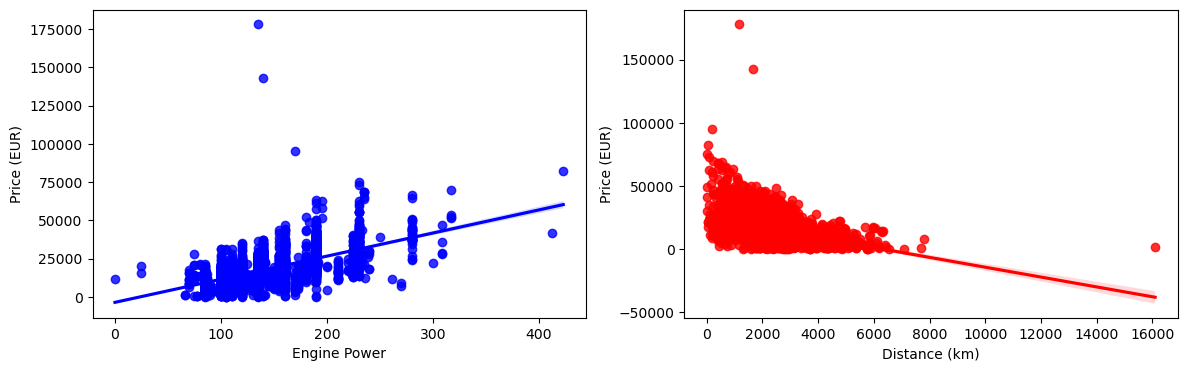

In [30]:
# regression plot
fig, reggplot = plt.subplots(1,2, figsize=(14,4))

def regression_plot(predictor, index, labelx, color, df=csales_dt, target="price_eur", labely="Price (EUR)", graph=reggplot):
  graph = sns.regplot(data=df, x=predictor, ax=graph[index], color=color, y=target)
  graph.set_xlabel(labelx)
  graph.set_ylabel(labely) 
  return reggplot

reggplot1 = regression_plot("engine_power", 0, "Engine Power", "blue")
reggplot2 = regression_plot("dist_travelled_p100km", 1, "Distance (km)","red")
# reggplot1 = sns.regplot(data=csales_dt, x="engine_power", y="price_eur", ax=reggplot[0]) 
# reggplot2 = sns.regplot(data=csales_dt, x="dist_travelled_km", y="price_eur", ax=reggplot[1])


### Linear Regression

In [66]:
# import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# variables for model buidling
x = csales_dt[["engine_power"]]
y = csales_dt["price_eur"]

In [68]:
y1 = pd.DataFrame(y).reset_index()


In [69]:
# split training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=50)

In [70]:
# create a price model
pmodel1 = LinearRegression()
pmodel1.fit(x_train, y_train)
# predict the price value
price_pred = pmodel1.predict(x_test)
price_pred

array([16333.45189424, 11440.68865831,  9343.79012863, ...,
        9343.79012863, 16333.45189424, 16333.45189424])

In [71]:
# evaluate the price model
mse = mean_squared_error(y_test, price_pred)
r2 = r2_score(y_test, price_pred)
print(f"Mean Squared Error for Sales Price: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error for Sales Price: 50794811.8767
R-squared: 0.4047


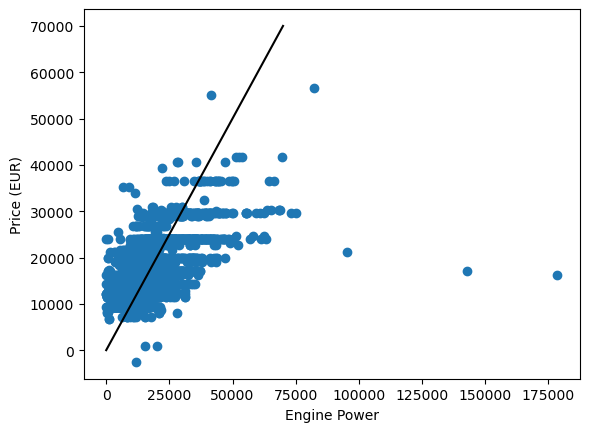

In [72]:
# visualise the sales price data with predicted price data
plt.scatter(y_test, price_pred)
plt.plot(np.arange(0,70000), color="black")
plt.xlabel("Engine Power")
plt.ylabel("Price (EUR)")
plt.show()

In [73]:
# create instance variables for model building
x2 = csales_dt[["engine_power"]].iloc[0:500]
y2 = csales_dt["price_eur"].iloc[0:500]

# create model 2
x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size=100 )
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [74]:
# calculate price prediction on model 2
price_pred2 = model2.predict(x_test)

In [75]:
# size of test and train data
size_x = x_train.size, x_test.size
size_y = y_train.size, y_test.size
print(f"x training data size: training data {size_x[0], size_x[1]}")
print(f"y training data size: training data {size_y[0], size_y[1]}")

x training data size: training data (100, 400)
y training data size: training data (100, 400)


In [76]:
# determine mean squared error + r-squared
mse = mean_squared_error(y_test, price_pred2)
r2 = r2_score(y_test, price_pred2)
print(f"Mean Squared Error for model 2: {mse}")
print(f"R-squared for model 2: {r2}")

Mean Squared Error for model 2: 61224165.03525108
R-squared for model 2: 0.28756559274058147


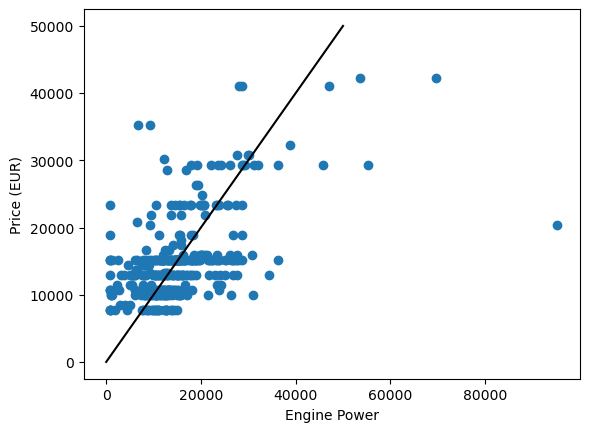

In [77]:
# visualise linear regression model
plt.scatter(y_test, price_pred2)
plt.plot(np.arange(0,50000), color="black")
plt.xlabel("Engine Power")
plt.ylabel("Price (EUR)")
plt.show()

In [79]:
y_mean = y_test
y_pred = pd.Series(price_pred2)
error = y_pred - y_mean
y_mean.size, y_pred.size
y_mean

119    27600
145    12800
59     19000
74     22400
328    15800
       ...  
244    11900
471    21400
49      8400
212    12600
401    15700
Name: price_eur, Length: 400, dtype: int64

In [80]:
y_pred

0      12942.893866
1      15177.959236
2      15177.959236
3      15177.959236
4      15177.959236
           ...     
395    15922.981026
396     9962.806706
397     9962.806706
398     7727.741337
399    17413.024606
Length: 400, dtype: float64